For EDA, model selection and how information about the df_metedata pickle object click [here](https://www.kaggle.com/batofgotham/eda-and-feature-selection?scriptVersionId=28684443)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pssdpickledf-metedata-pickle/df_metedata_pickle
/kaggle/input/porto-seguro-safe-driver-prediction/sample_submission.csv
/kaggle/input/porto-seguro-safe-driver-prediction/test.csv
/kaggle/input/porto-seguro-safe-driver-prediction/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
input_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'
df = pd.read_csv(input_path+'train.csv')
df_test = pd.read_csv(input_path+'test.csv')

In [4]:
id_test = df_test['id']

In [5]:
df.shape

(595212, 59)

In [6]:
target = df['target']

In [7]:
target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

- As it is imbalanced dataset we have to synthesize for new data points 

In [8]:
df.drop(columns=['target'],inplace=True)

### Getting the Metadata Dataframe

In [9]:
import pickle
df_metadata = pickle.load(open('/kaggle/input/pssdpickledf-metedata-pickle/df_metedata_pickle','rb'))

In [10]:
df_metadata

,DTypes,Dropped,Missing
id,int64,True,7.000000
ps_ind_01,Ordinal,False,0.000000
ps_ind_02_cat,Categorical,False,1.000000
ps_ind_03,int64,False,4.423318
ps_ind_04_cat,Categorical,False,0.000000
ps_ind_05_cat,Categorical,False,0.000000
ps_ind_06_bin,Categorical,False,0.000000
ps_ind_07_bin,Categorical,False,0.000000
ps_ind_08_bin,Categorical,False,0.000000
ps_ind_09_bin,Categorical,False,0.000000


 - Before Synthesizing the new data lets complete the pre processing

### PreProcessing

- Dropping Stastically insignificant columns, Filling the Missing values and changing the datatypes of columns accordingly

In [11]:
def preprocessing(df):
    df.replace(to_replace=-1,value=np.nan,inplace=True)
    for col in df.columns:
        #Dropping Insignificant Columns
        if df_metadata.loc[col,'Dropped']:
            df.drop(columns=[col],inplace=True)
            continue
        #Filling Missing Values
        df[col].fillna(df_metadata.loc[col,'Missing'],inplace=True)
        #Changing the datatype of columns
        if (df_metadata.loc[col,'DTypes'] == 'Categorical') or (df_metadata.loc[col,'DTypes'] == 'Ordinal'):
            df[col] = df[col].astype('category')

In [12]:
df.shape

(595212, 58)

In [13]:
preprocessing(df)
preprocessing(df_test)

In [14]:
df.isnull().sum()

ps_ind_01        0
ps_ind_02_cat    0
ps_ind_03        0
ps_ind_04_cat    0
ps_ind_05_cat    0
ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_12_bin    0
ps_ind_14        0
ps_ind_15        0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
ps_reg_01        0
ps_reg_02        0
ps_reg_03        0
ps_car_01_cat    0
ps_car_02_cat    0
ps_car_04_cat    0
ps_car_05_cat    0
ps_car_06_cat    0
ps_car_07_cat    0
ps_car_08_cat    0
ps_car_09_cat    0
ps_car_11_cat    0
ps_car_11        0
ps_car_12        0
ps_car_13        0
ps_car_14        0
ps_car_15        0
dtype: int64

In [15]:
df_test.isnull().sum()

ps_ind_01        0
ps_ind_02_cat    0
ps_ind_03        0
ps_ind_04_cat    0
ps_ind_05_cat    0
ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_12_bin    0
ps_ind_14        0
ps_ind_15        0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
ps_reg_01        0
ps_reg_02        0
ps_reg_03        0
ps_car_01_cat    0
ps_car_02_cat    0
ps_car_04_cat    0
ps_car_05_cat    0
ps_car_06_cat    0
ps_car_07_cat    0
ps_car_08_cat    0
ps_car_09_cat    0
ps_car_11_cat    0
ps_car_11        0
ps_car_12        0
ps_car_13        0
ps_car_14        0
ps_car_15        0
dtype: int64

### Operating with outliers

- The Idea is to find the outliers and replace them accordingly

In [16]:
def outlier_processing(df,df_test):
    for col in df.columns:
        if df[col].dtype.name != 'category':
            first_quartile, third_quartile = np.percentile(df[col],[25,75])
            first_percetnile, ninetynine_percentile = np.percentile(df[col],[1,99])
            IQR = third_quartile - first_quartile
            lower_bound = first_quartile - (1.5*IQR)
            upper_bound = third_quartile + (1.5*IQR)
            df[col].loc[df[col]>upper_bound] = ninetynine_percentile
            df_test[col].loc[df_test[col]>upper_bound] = ninetynine_percentile
            df[col].loc[df[col]<lower_bound] = first_percetnile
            df_test[col].loc[df_test[col]<lower_bound] = first_percetnile
        

In [17]:
outlier_processing(df,df_test)

### Encoding

- The Idea is to encode the ordinal values with Ordinal Encoder and Categorical values with OneHot Encoder - unless they are binary

In [18]:
ordinal_columns = [col for col in df.columns if df_metadata.loc[col,'DTypes'] == 'Ordinal' and df[col].nunique() > 2]

In [19]:
categorical_columns_great_2 = [col for col in df.columns if df_metadata.loc[col,'DTypes'] == 'Categorical' and df[col].nunique() > 2]

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in ordinal_columns:
    label_encode = LabelEncoder()
    df[col+'label'] = label_encode.fit_transform(df[col])
    df_test[col+'label'] = label_encode.transform(df_test[col])
    df.drop(columns=[col],inplace=True)
    df_test.drop(columns=[col],inplace=True)

In [21]:
df = pd.get_dummies(df,prefix=col,columns=categorical_columns_great_2,drop_first=True)
df_test = pd.get_dummies(df_test,columns=categorical_columns_great_2,prefix=col,drop_first=True)

In [22]:
df.shape

(595212, 178)

In [23]:
df_test.shape

(892816, 178)

### Lets do the scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
df_train_scale = scaler.fit_transform(df)

In [26]:
df_test_scale = scaler.transform(df_test)

## Making data in to multiple folds

In [27]:
df_train_scale = pd.DataFrame(df_train_scale,columns=df.columns)
df_test_scale = pd.DataFrame(df_test_scale,columns=df_test.columns)

In [28]:
chunks = [df_train_scale,target]
df_train_scale_target = pd.concat(chunks,axis=1)
df_minority = df_train_scale_target.loc[df_train_scale_target['target'] == 1].copy()
df_majority = df_train_scale_target.loc[df_train_scale_target['target'] == 0].copy()

In [29]:
splitted_frame = np.array_split(df_majority, 20)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg= LogisticRegression(max_iter=100000)

In [31]:
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}

In [32]:
from sklearn.utils import shuffle
y_train_pred_proba = 0
y_test_pred_proba = 0
for frames in splitted_frame:
    Glog_reg = GridSearchCV(estimator = log_reg,param_grid = param, scoring = 'accuracy', cv=5)
    chunks_temp = [frames,df_minority]
    df_temp_train = shuffle(pd.concat(chunks_temp,axis=0))
    target_train = df_temp_train['target']
    df_temp_train.drop(columns=['target'],inplace=True)
    Glog_reg.fit(df_temp_train,target_train)
    best_model = Glog_reg.best_estimator_
    best_model.fit(df_temp_train,target_train)
    y_train_pred_proba = y_train_pred_proba + best_model.predict_proba(df_train_scale)[:,1]
    y_test_pred_proba = y_test_pred_proba + best_model.predict_proba(df_test_scale)[:,1]
    

In [33]:
y_train_pred_proba = y_train_pred_proba/20
y_test_pred_proba = y_test_pred_proba/20

### Receiver Operator Characterstics

Text(0.5, 0, 'False positive rate')

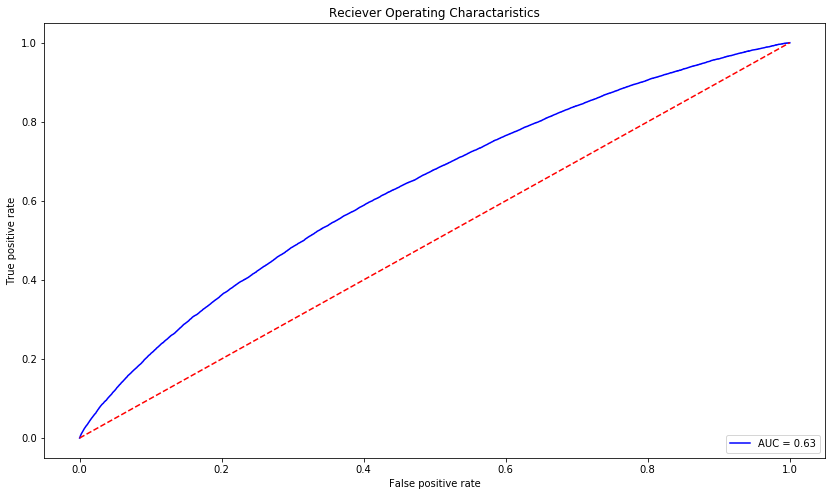

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thresold = roc_curve(target,y_train_pred_proba)
auc = roc_auc_score(target,y_train_pred_proba)
plt.figure(figsize=(14,8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [35]:
auc

0.6316013183158095

## Submition

In [36]:
submit = pd.DataFrame({'id':id_test,'target':y_test_pred_proba})
submit.to_csv('logreg_porto.csv',index=False) 
submit.head()

,id,target
0,0,0.367697
1,1,0.409075
2,2,0.339037
3,3,0.287247
4,4,0.431547
